In [3]:
import os
if os.path.basename(os.getcwd())=='experiments':
    os.chdir("./..")

In [4]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics
from utils.data_preparation import *
from utils.model_loading import *
from model.hierarchical_size_model import *
from tqdm import tqdm

## Evaluate models

In [79]:
def show_model_parameters(hss):
    print("mean_eta_big : ",hss.mean_eta_big)
    print("mean_eta_small: ", hss.mean_eta_small)
    print("iterations: ", hss.iterations)
    print("converged: ", hss.all_converged())
    print("mean of mu_a")
    sns.histplot(hss.mean_mu_a)
    plt.show()
    print("mean of mu_c")
    sns.histplot(hss.mean_mu_c)
    plt.show()

def print_stats(results):
    print("Mean target probability: ", results["size_prob"].mean())
    print("Mean target log probability: ", np.log(results["size_prob"]).replace({-np.inf, np.nan}).mean())
    print("STATS", sklearn.metrics.classification_report(results["result"], results["predicted_size"]))

def evaluate_model(hss, test_df):
    show_model_parameters(hss)
    results = hss.predict(test_df)
    print_stats(results)
    return results

Model trained on full dataset, no learning rate, did not converge (200109 iterations)

Loading model models/hss_full20220719-025747.model
mean_eta_big :  3.7757170706561882
mean_eta_small:  7.267423361921556
iterations:  200109
converged:  False
mean of mu_a


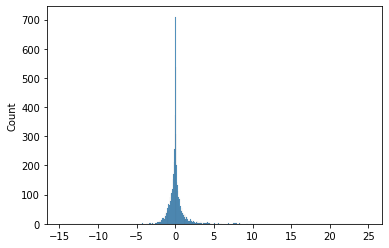

mean of mu_c


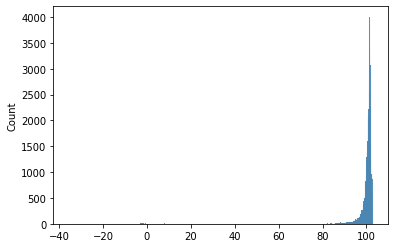

Mean target probability:  0.0005544180877279861
Mean target log probability:  -8.935047018970268
STATS               precision    recall  f1-score   support

           0       0.85      0.06      0.11     14199
           1       0.54      0.01      0.03      2488
           2       0.21      0.00      0.01      2568
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.0

/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
hss_full = load_model("hss_full", select="latest")
test_df = get_test_runttherunway_data()
results = evaluate_model(hss_full, test_df)

Loading model models/hss_full_lr0.520220719-103017.model
mean_eta_big :  60.75508508846427
mean_eta_small:  59.989224366975634
iterations:  630
converged:  True
mean of mu_a


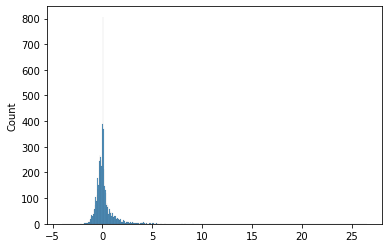

mean of mu_c


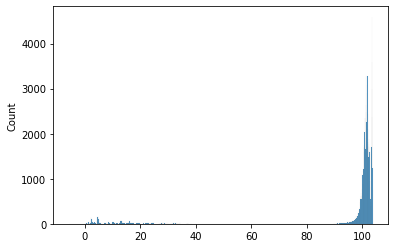

Mean target probability:  0.0007688442681107844
Mean target log probability:  -9.33116880975427
STATS               precision    recall  f1-score   support

           0       1.00      0.01      0.01     14199
           1       0.00      0.00      0.00      2488
           2       0.00      0.00      0.00      2568
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00

/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
hss_full = load_model("hss_full_lr0.5", select="latest")
test_df = get_test_runttherunway_data()
results = evaluate_model(hss_full, test_df)

Loading model models/hss_full_lr0.99_20220719-173523.model
mean_eta_big :  61.07177203131492
mean_eta_small:  60.357452308041495
iterations:  200000
converged:  False
mean of mu_a


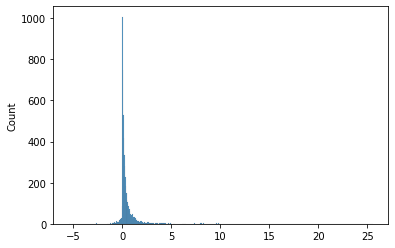

mean of mu_c


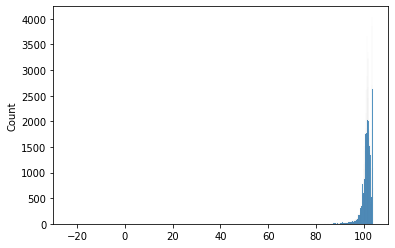

Mean target probability:  0.00020816232264675978
Mean target log probability:  -9.510966273782085
STATS               precision    recall  f1-score   support

           0       1.00      0.01      0.01     14199
           1       0.00      0.00      0.00      2488
           2       0.00      0.00      0.00      2568
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.

/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
hss_full = load_model("hss_full_lr0.99_", select="latest")
test_df = get_test_runttherunway_data()
results = evaluate_model(hss_full, test_df)

Loading model models/hss_full_lr0.7_20220720-012700.model
mean_eta_big :  60.78065826565269
mean_eta_small:  60.00919915182888
iterations:  200000
converged:  False
mean of mu_a


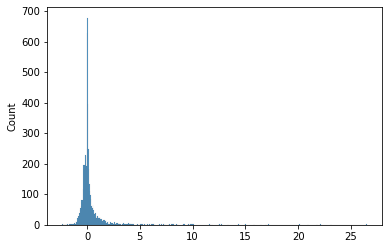

mean of mu_c


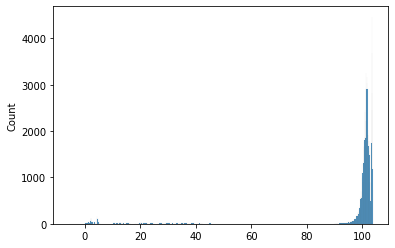

Mean target probability:  0.0006113283452288583
Mean target log probability:  -9.382125757326609
STATS               precision    recall  f1-score   support

           0       1.00      0.01      0.01     14199
           1       0.00      0.00      0.00      2488
           2       0.00      0.00      0.00      2568
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.0

/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
hss_full = load_model("hss_full_lr0.7_", select="latest")
test_df = get_test_runttherunway_data()
results = evaluate_model(hss_full, test_df)

Loading model models/hss_full_lr0.25_20220720-013004.model
mean_eta_big :  60.75798656696736
mean_eta_small:  59.97452031957525
iterations:  1453
converged:  True
mean of mu_a


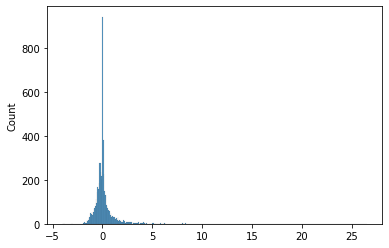

mean of mu_c


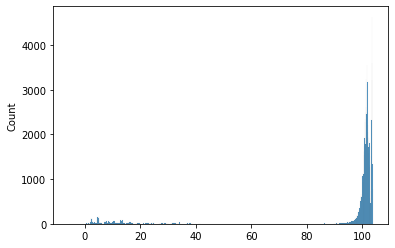

Mean target probability:  0.0008734179770495602
Mean target log probability:  -9.298567412121274
STATS               precision    recall  f1-score   support

           0       1.00      0.00      0.01     14199
           1       0.00      0.00      0.00      2488
           2       0.00      0.00      0.00      2568
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.0

/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
hss_full = load_model("hss_full_lr0.25_", select="latest")
test_df = get_test_runttherunway_data()
results = evaluate_model(hss_full, test_df)

In [73]:
hss_full.mu_0/hss_full.sigma_0

1.4414776788030872

### Training models

In [ ]:
df = get_processed_renttherunway_data()

In [8]:
hss_test = HierarchicalSizeSimplified(df)

In [22]:
hss_test = HierarchicalSizeSimplified(df, learning_rate=0.99)
for i in range(20):
    for j in tqdm(range(10000)):
        hss_test.update()
        if hss_test.all_converged():
            print(f"converged after {i*10000+j} iterations")
            break
    save_model(hss_test, "hss_full_lr0.99_", add_date=True)
    if hss_test.all_converged():
        break

100%|██████████| 10000/10000 [21:23<00:00,  7.79it/s]


In [23]:
hss_test = HierarchicalSizeSimplified(df, learning_rate=0.7)
for i in range(20):
    for j in tqdm(range(10000)):
        hss_test.update()
        if hss_test.all_converged():
            print(f"converged after {i*10000+j} iterations")
            break
    save_model(hss_test, "hss_full_lr0.7_", add_date=True)
    if hss_test.all_converged():
        break

100%|██████████| 10000/10000 [21:52<00:00,  7.62it/s]


In [24]:
hss_test = HierarchicalSizeSimplified(df, learning_rate=0.25)
for i in range(20):
    for j in tqdm(range(10000)):
        hss_test.update()
        if hss_test.all_converged():
            print(f"converged after {i*10000+j} iterations")
            break
    save_model(hss_test, "hss_full_lr0.25_", add_date=True)
    if hss_test.all_converged():
        break

 15%|█▍        | 1452/10000 [03:03<18:02,  7.90it/s]

converged after 1452 iterations


Training models on not-full data does not work yet.  
But getting sensible results for model trained on full dataset takes priority.

In [25]:
train = get_train_runttherunway_data()
hss_train = HierarchicalSizeSimplified(train, learning_rate=0.5)
for i in range(10):
    for j in tqdm(range(10000)):
        hss_test.update()
        if hss_test.all_converged():
            print(f"converged after {i*10000+j} iterations")
            break
    save_model(hss_test, "hss_train_lr0.5_", add_date=True)
    if hss_test.all_converged():
        break

IndexError: index 103908 is out of bounds for axis 0 with size 98105

In [ ]:
train = get_train_runttherunway_data()
hss_train = HierarchicalSizeSimplified(train, learning_rate=0.25)
for i in range(10):
    for j in tqdm(range(10000)):
        hss_test.update()
        if hss_test.all_converged():
            print(f"converged after {i*10000+j} iterations")
            break
    save_model(hss_test, "hss_train_lr0.25_", add_date=True)
    if hss_test.all_converged():
        break

In [ ]:
train = get_train_runttherunway_data()
hss_train = HierarchicalSizeSimplified(train, learning_rate=1)
for i in range(20):
    for j in tqdm(range(10000)):
        hss_test.update()
        if hss_test.all_converged():
            print(f"converged after {i*10000+j} iterations")
            break
    save_model(hss_test, "hss_train_lr1_", add_date=True)
    if hss_test.all_converged():
        break

In [ ]:
train = get_train_runttherunway_data()
hss_train = HierarchicalSizeSimplified(train, learning_rate=0.7)
for i in range(20):
    for j in tqdm(range(10000)):
        hss_test.update()
        if hss_test.all_converged():
            print(f"converged after {i*10000+j} iterations")
            break
    save_model(hss_test, "hss_train_lr0.7_", add_date=True)
    if hss_test.all_converged():
        break

In [18]:
hss_test = HierarchicalSizeSimplified(df, learning_rate=0.5)
for i in range(20):
    for j in tqdm(range(10000)):
        hss_test.update()
        if hss_test.all_converged():
            print(f"converged after {i*10000+j} iterations")
            break
    save_model(hss_test, "hss_full_lr0.5", add_date=True)

  6%|▋         | 629/10000 [01:27<21:49,  7.16it/s]


converged after 629 iterations


  0%|          | 0/10000 [00:00<?, ?it/s]


converged after 10000 iterations


KeyboardInterrupt: Interrupted by user

In [21]:
hss_test.mean_eta_small

59.98922424380483

In [ ]:
# 100 iterations ~ 12s
for i in range(100):
    hss_test.update()
    if hss_test.all_converged():
        print(i)
        break

In [15]:
for i in range(10):
    for j in tqdm(range(10000)):
        hss_test.update()
        if hss_test.all_converged():
            print(f"converged after {i*10000+j} iterations")
            break
    save_model(hss_test, "hss_full", add_date=True)
    

100%|██████████| 10000/10000 [19:59<00:00,  8.34it/s]


In [16]:
for i in range(10):
    for j in tqdm(range(10000)):
        hss_test.update()
        if hss_test.all_converged():
            print(f"converged after {i*10000+j} iterations")
            break
    save_model(hss_test, "hss_full", add_date=True)

100%|██████████| 10000/10000 [19:57<00:00,  8.35it/s]
